<a href="https://colab.research.google.com/github/Almulham/Rihal-s-Challenge-Code/blob/main/Rihal's_Data_science_challenge(Almulham_Albusaidi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Challenge info: https://github.com/rihal-om/rihal-challenges/tree/main/data_science

Steps that will be taken to solve the problem presented in the challenge
     

1.   Start with base model on training data (df_train)
2.   Test base model with test data (df_test)
3.   Use 'Pycaret' to evaluate other models
4.   Choose best model compared to base model chosen





# Data Quality and EDA

## Quality

Start with checking the quality of the dataset given

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = 110

In [2]:
#Read data
df_train = pd.read_csv('https://raw.githubusercontent.com/rihal-om/rihal-challenges/main/data_science/data_train.csv')

In [3]:
#Display df
display(df_train.head())

manufacturer_name transmission  color  odometer_value  year_produced  \
0        Volkswagen    automatic  black          130000           2016   
1           Renault       manual  brown          149000           2012   
2               Kia    automatic  brown          110000           2014   
3              Opel    automatic  other          255100           2007   
4             Mazda       manual   blue          650000           1999   

  engine_fuel engine_type  engine_capacity  body_type  has_warranty ownership  \
0      diesel      diesel              1.6  universal         False     owned   
1    gasoline    gasoline              1.6      sedan         False     owned   
2    gasoline    gasoline              1.6  hatchback         False     owned   
3    gasoline    gasoline              1.8  hatchback         False     owned   
4    gasoline    gasoline              2.0      sedan         False     owned   

  type_of_drive  is_exchangeable  number_of_photos  number_of_maintenance  \
0         front             True                17                     38   
1         front            False                 9                      3   
2         front            False                 5                     10   
3         front            False                10                      4   
4         front             True                 5                      7   

   duration_listed  price_usd  
0               67    13150.0  
1              100     7500.0  
2               91    12200.0  
3               91     4950.0  
4               62     3000.0

In [4]:
#Features info (focus on null values)
df_train.info() # 15 null values in 'engine_capacity'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      50000 non-null  object 
 1   transmission           50000 non-null  object 
 2   color                  50000 non-null  object 
 3   odometer_value         50000 non-null  int64  
 4   year_produced          50000 non-null  int64  
 5   engine_fuel            50000 non-null  object 
 6   engine_type            50000 non-null  object 
 7   engine_capacity        49985 non-null  float64
 8   body_type              50000 non-null  object 
 9   has_warranty           50000 non-null  bool   
 10  ownership              50000 non-null  object 
 11  type_of_drive          50000 non-null  object 
 12  is_exchangeable        50000 non-null  bool   
 13  number_of_photos       50000 non-null  int64  
 14  number_of_maintenance  50000 non-null  int64  
 15  du

In [5]:
# Drop null values
df_train.dropna(inplace=True)
#New df with non null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      49985 non-null  object 
 1   transmission           49985 non-null  object 
 2   color                  49985 non-null  object 
 3   odometer_value         49985 non-null  int64  
 4   year_produced          49985 non-null  int64  
 5   engine_fuel            49985 non-null  object 
 6   engine_type            49985 non-null  object 
 7   engine_capacity        49985 non-null  float64
 8   body_type              49985 non-null  object 
 9   has_warranty           49985 non-null  bool   
 10  ownership              49985 non-null  object 
 11  type_of_drive          49985 non-null  object 
 12  is_exchangeable        49985 non-null  bool   
 13  number_of_photos       49985 non-null  int64  
 14  number_of_maintenance  49985 non-null  int64  
 15  du

In [6]:
df_train.shape # 49,985   17

(49985, 17)

## EDA

Will be using sweetviz to allow more initial EDA freedom

                                             |          | [  0%]   00:00 -> (? left)


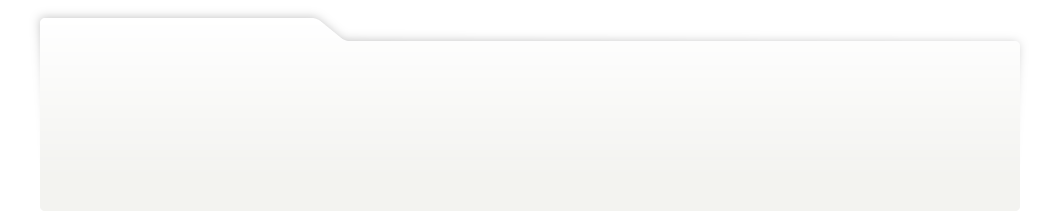
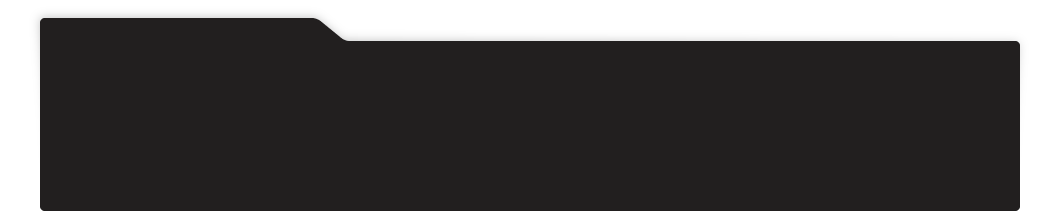
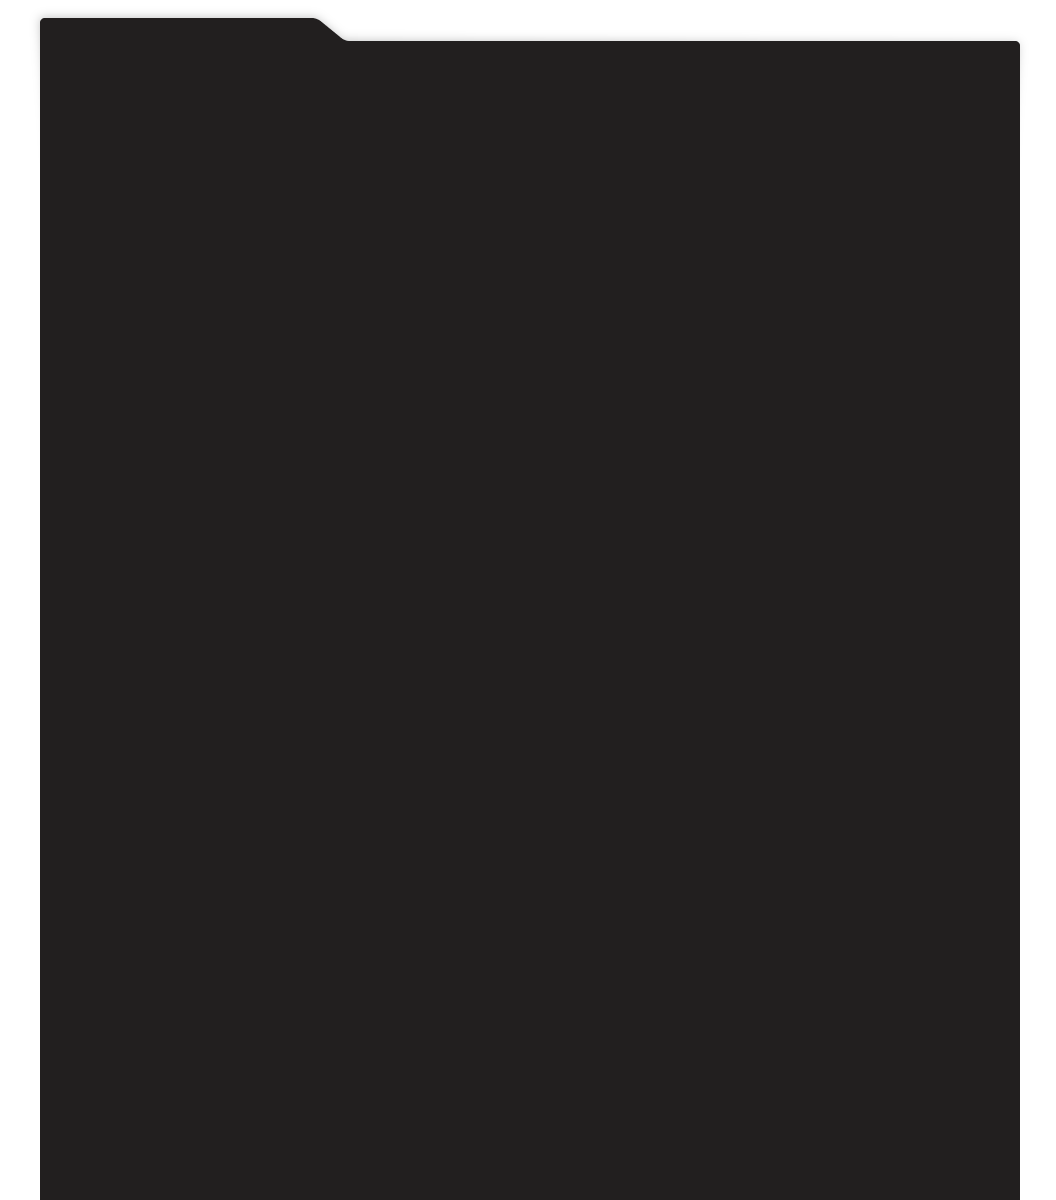
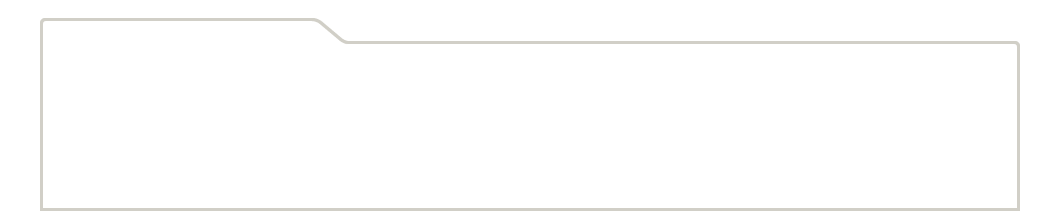
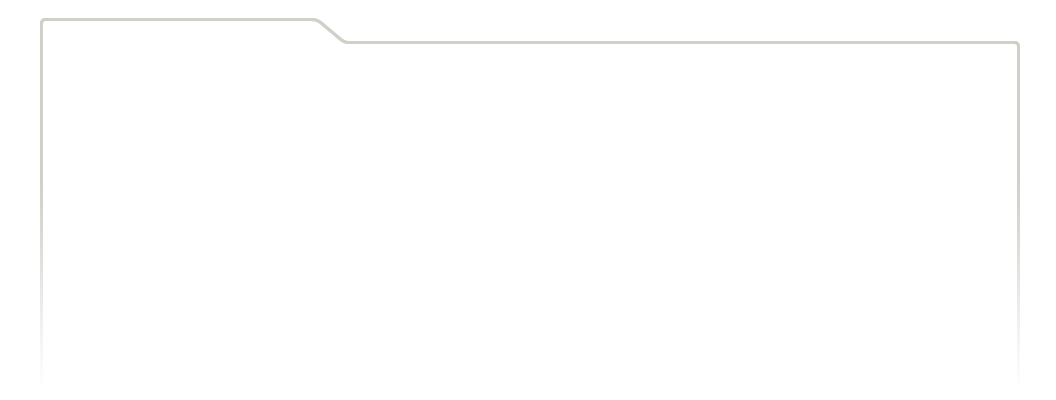
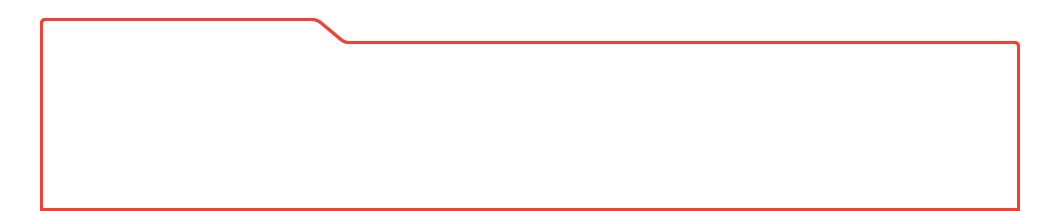
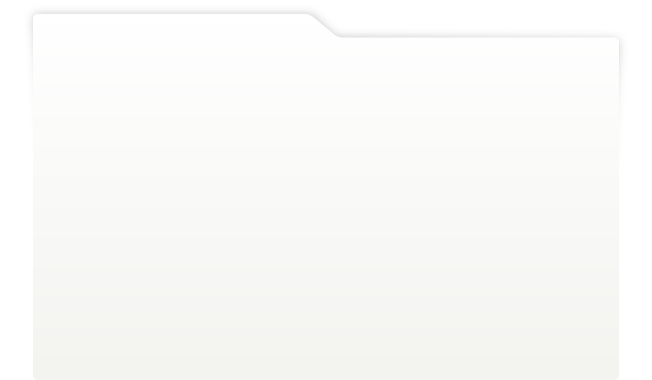
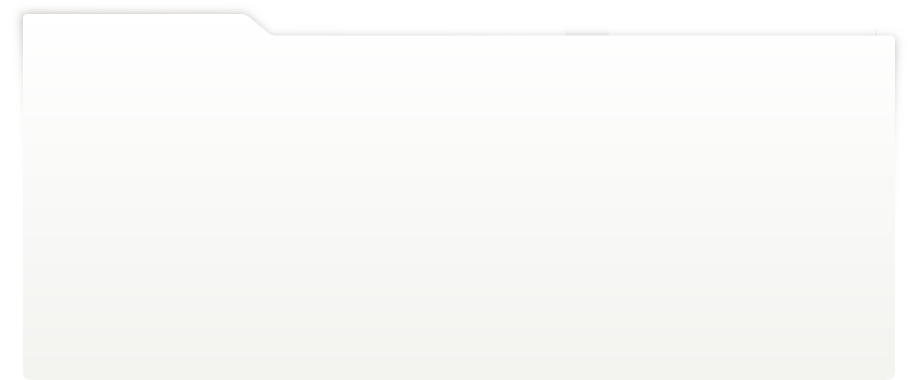
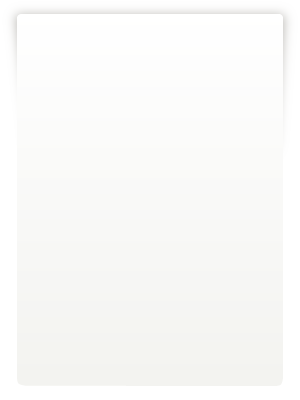
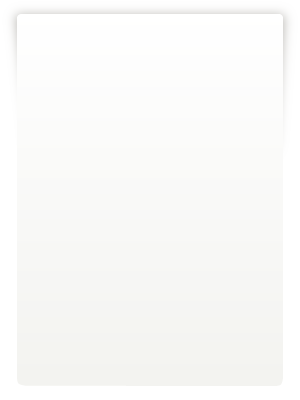
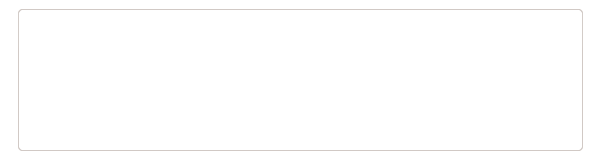
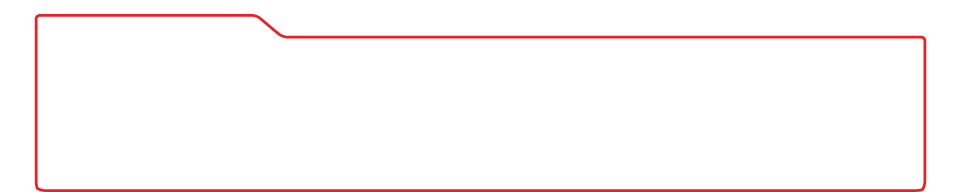
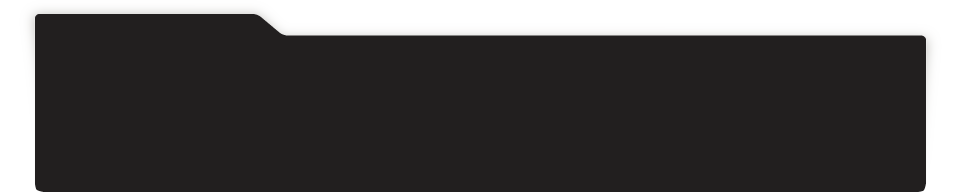
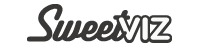
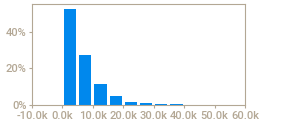
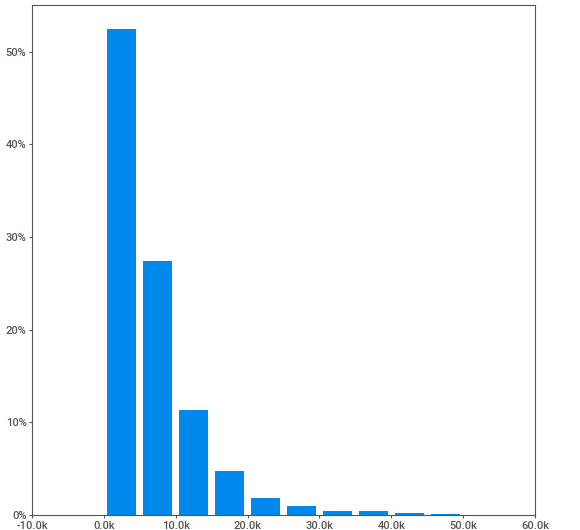
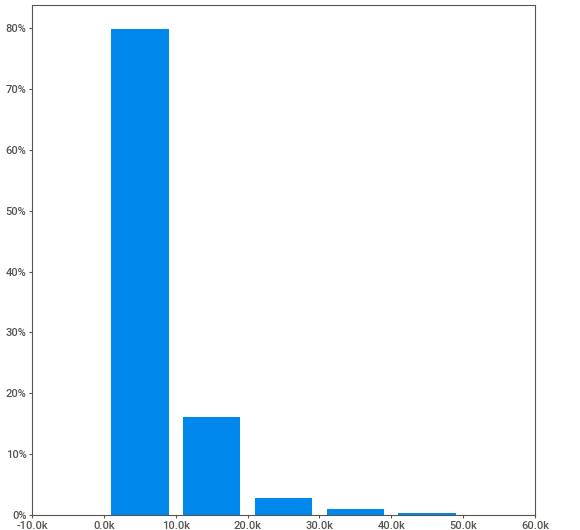
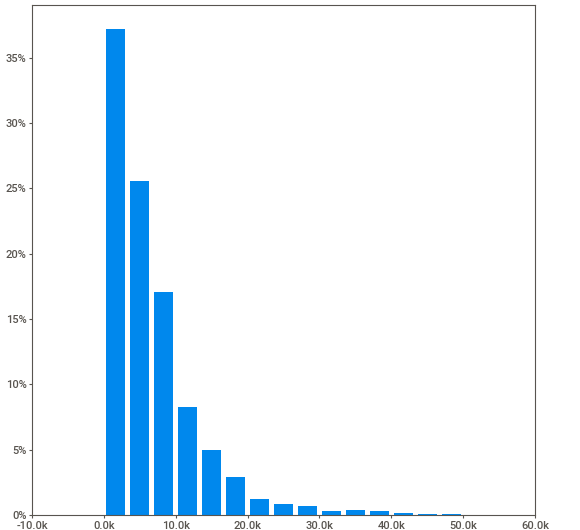
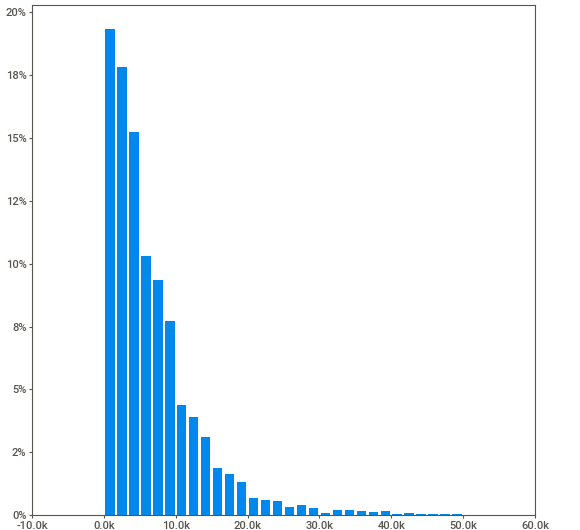
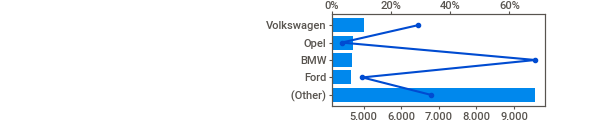
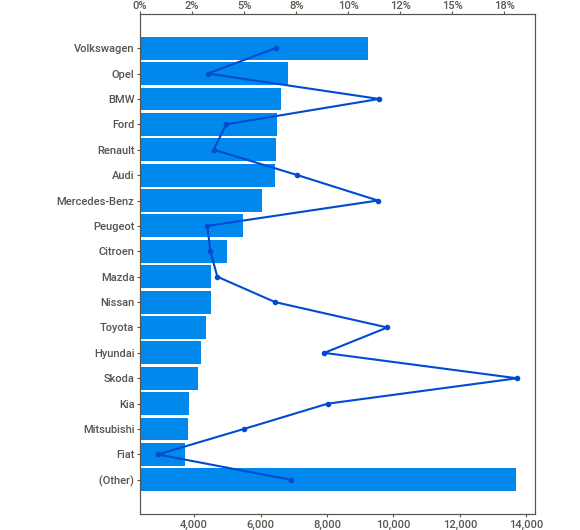
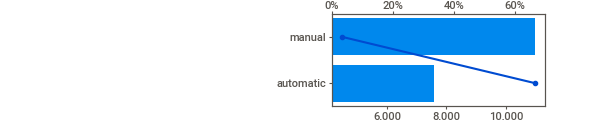
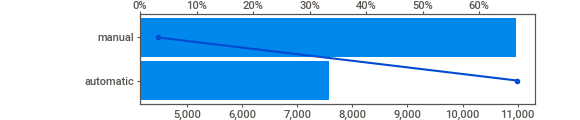
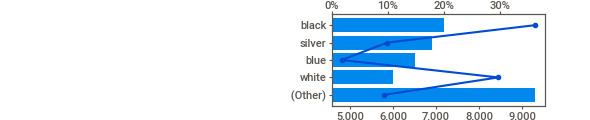
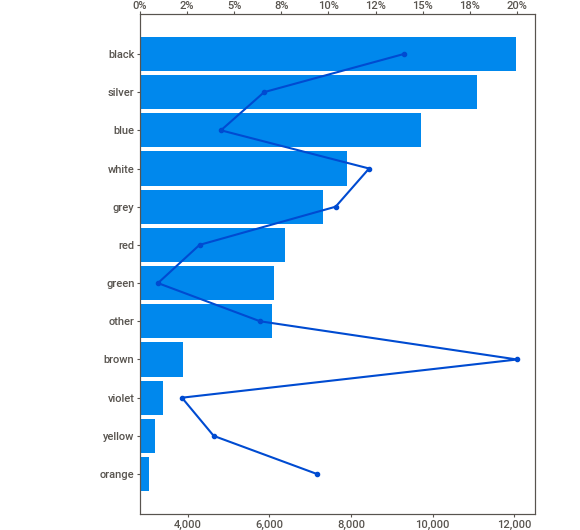
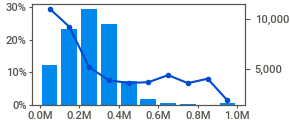
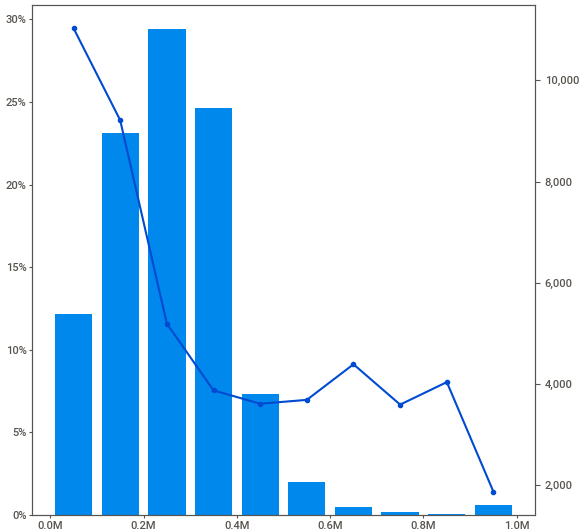
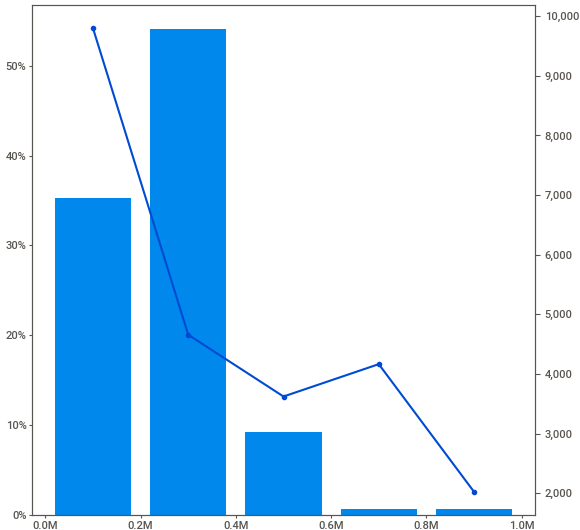
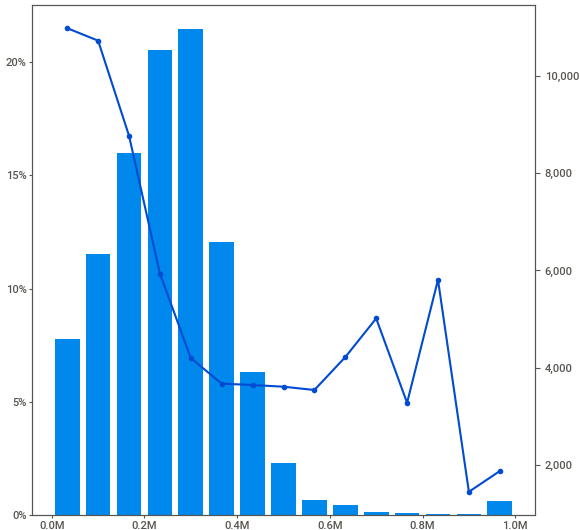
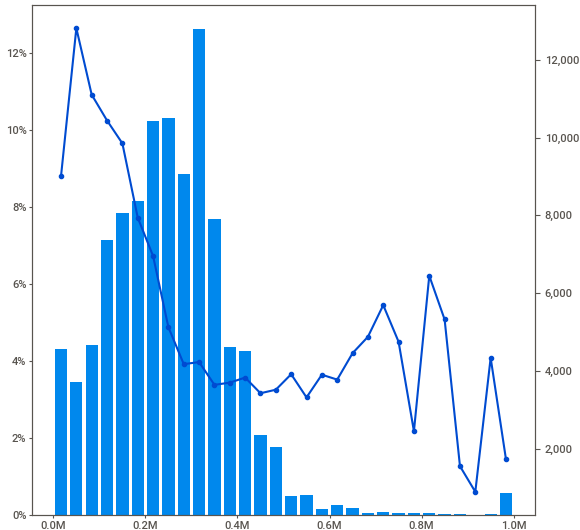
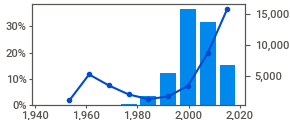
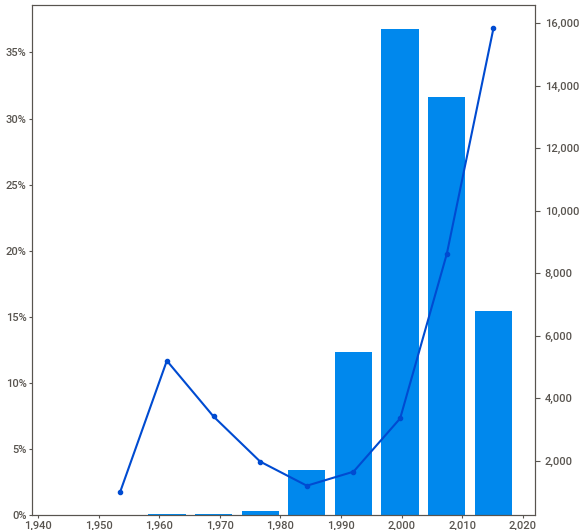
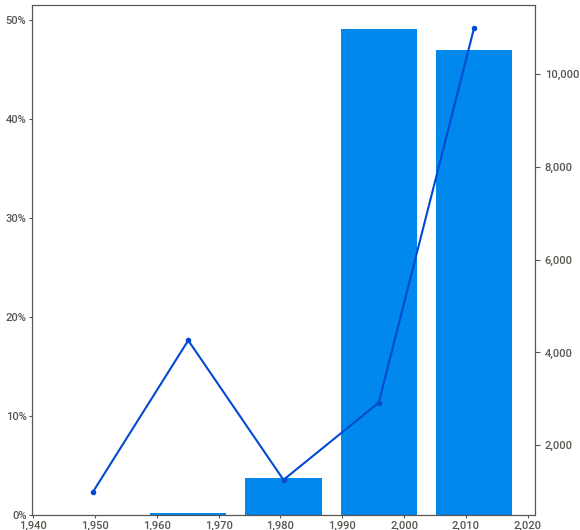
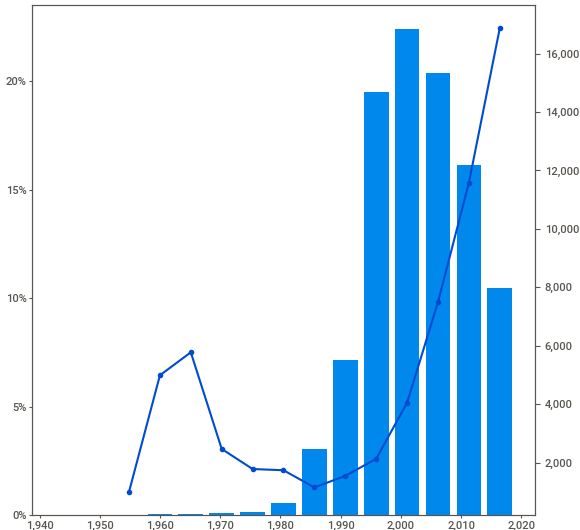
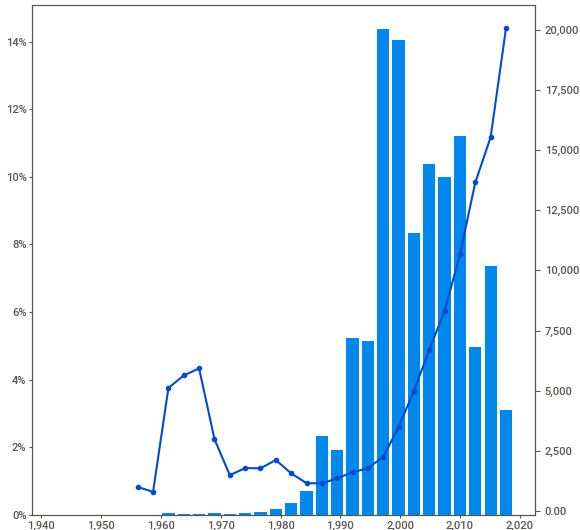
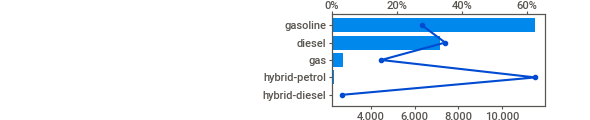
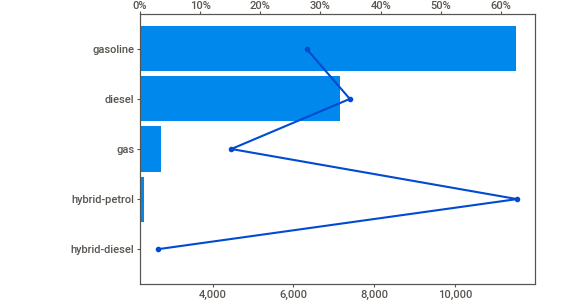
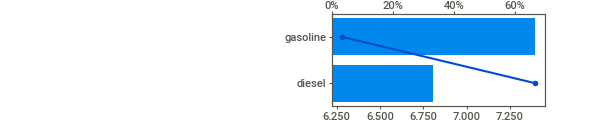
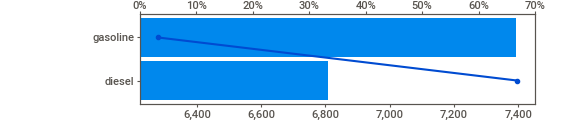
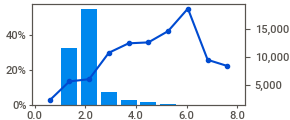
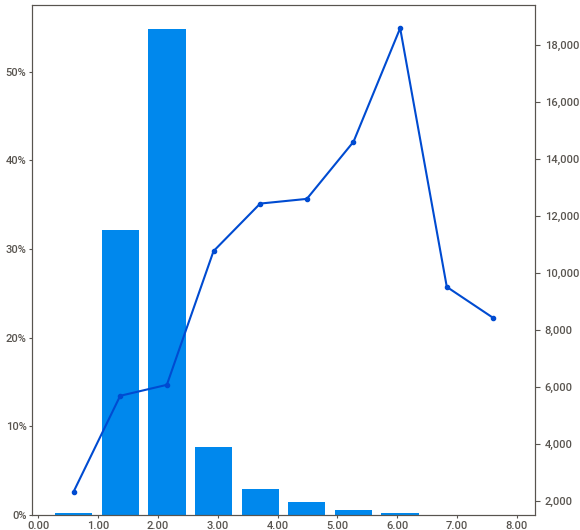
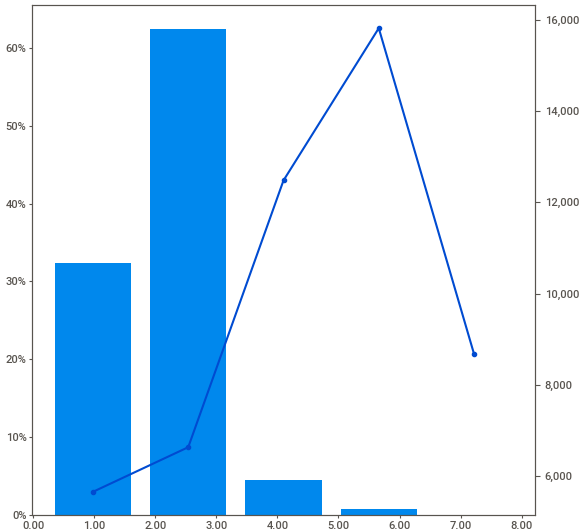
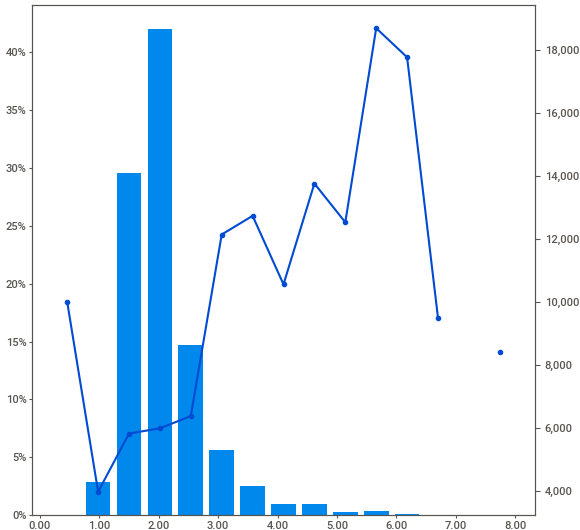
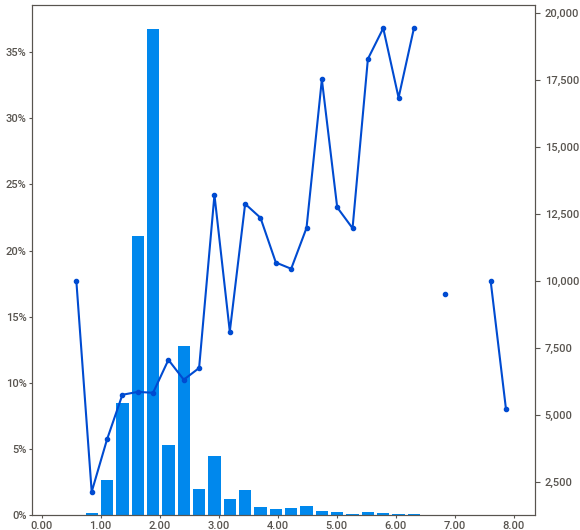
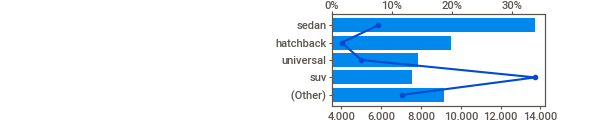
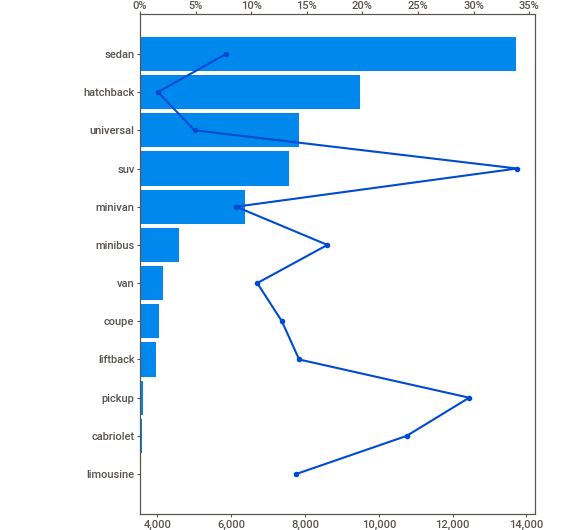
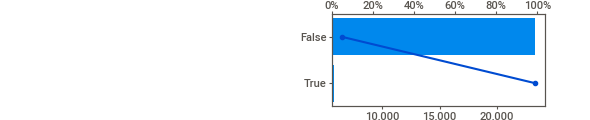
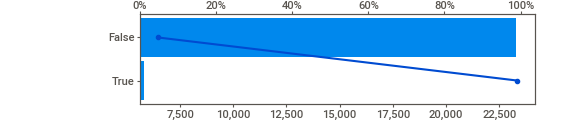
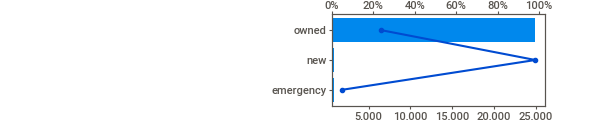
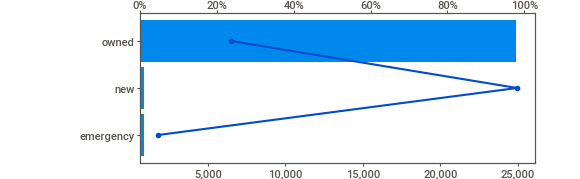
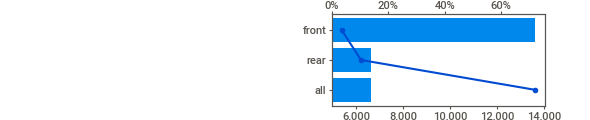
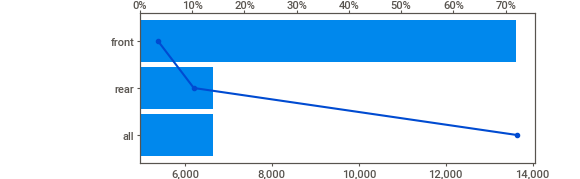
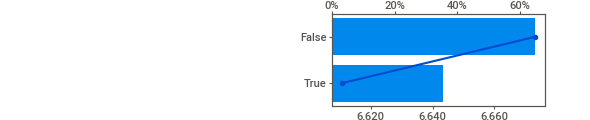
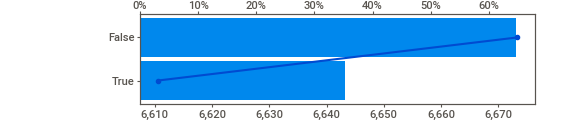
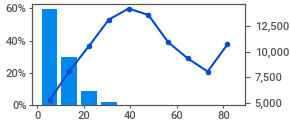
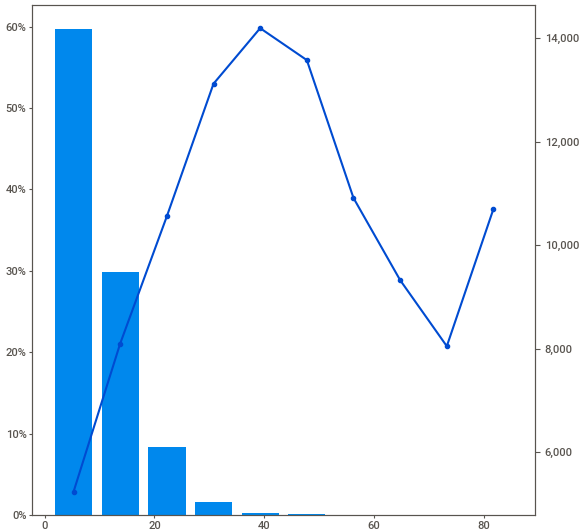
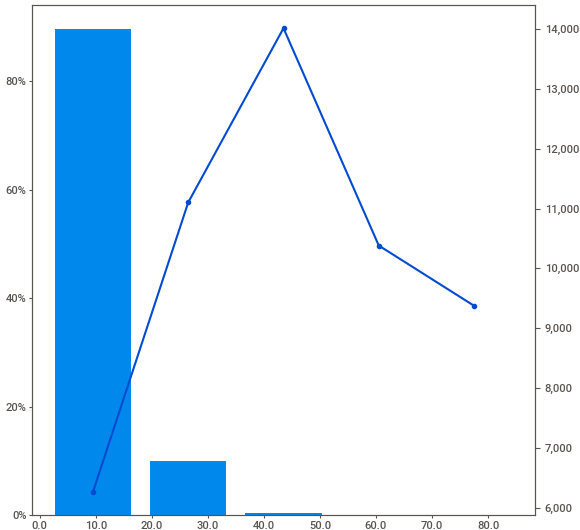
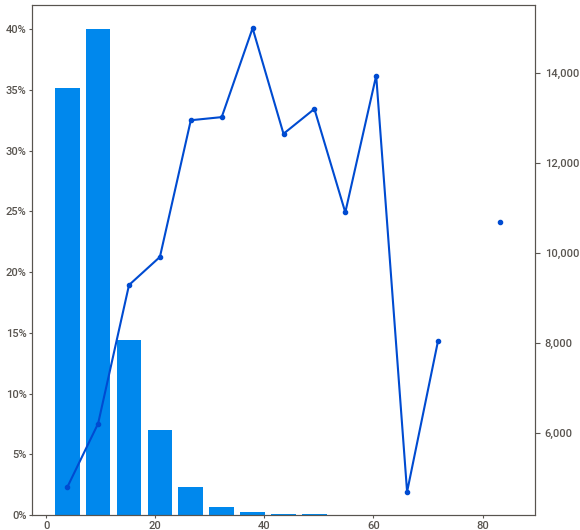
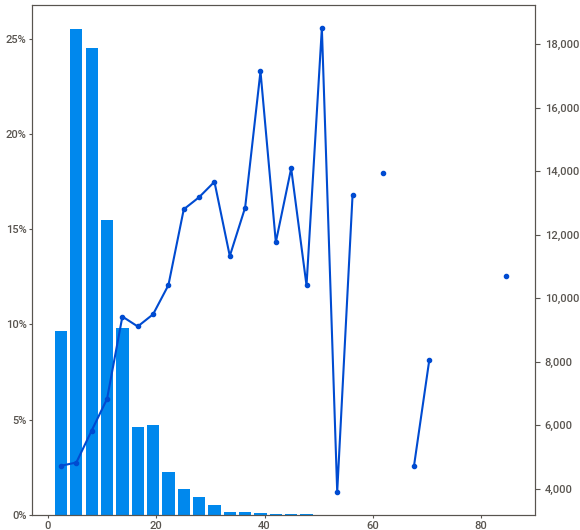
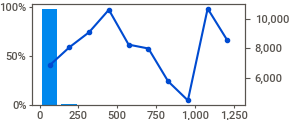
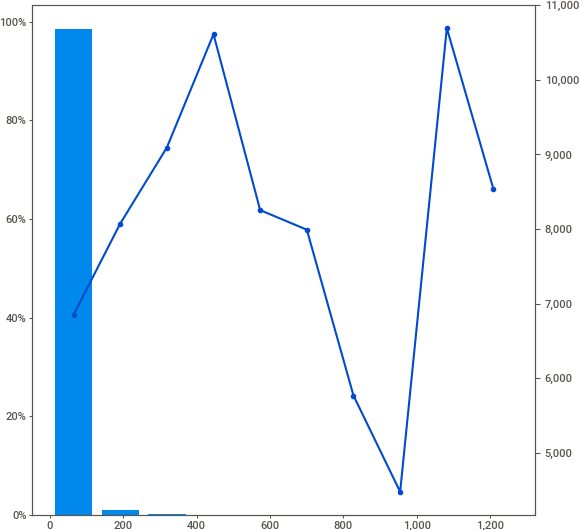
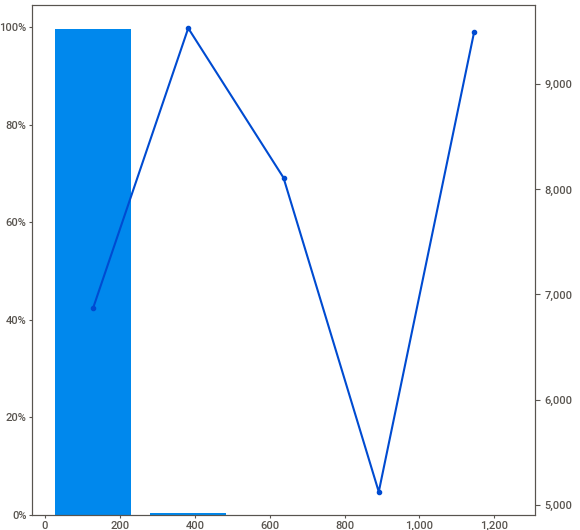
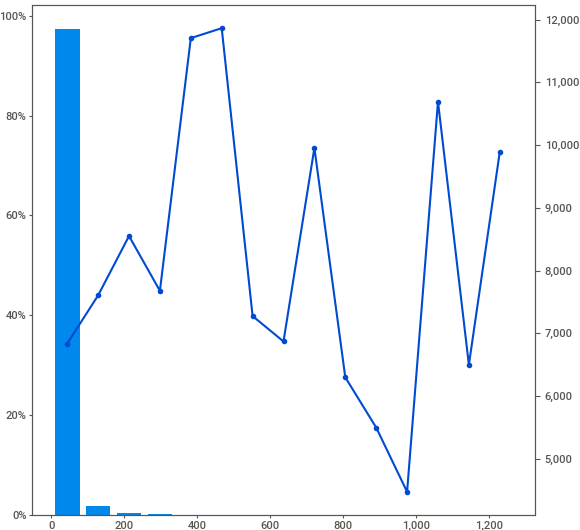
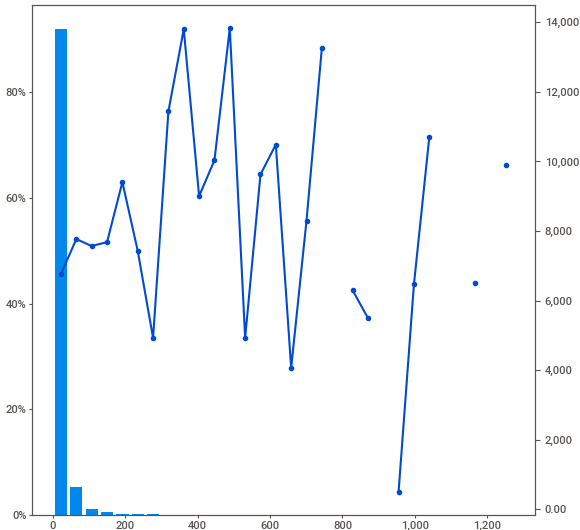
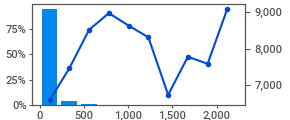
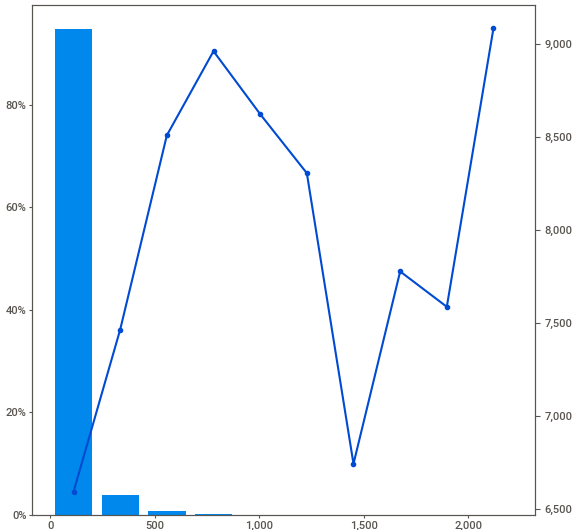
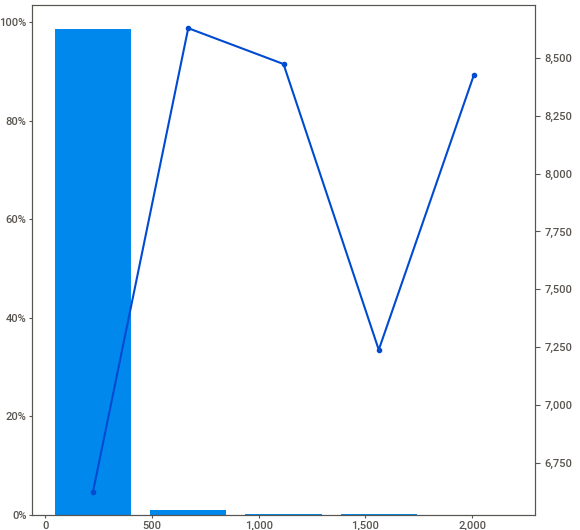
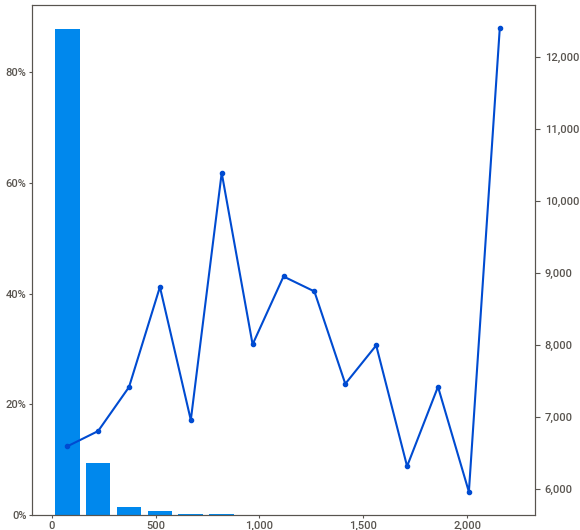
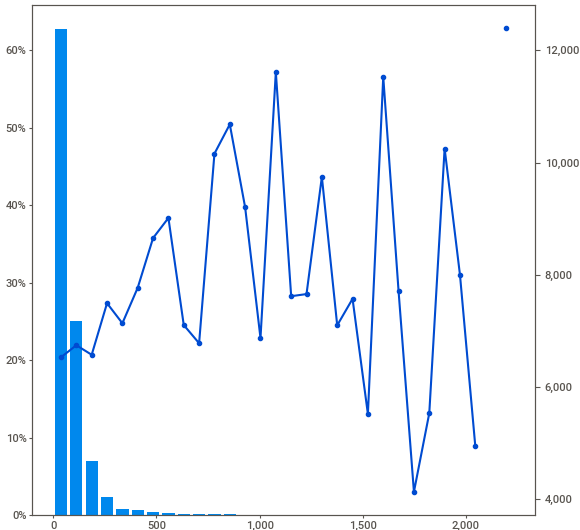
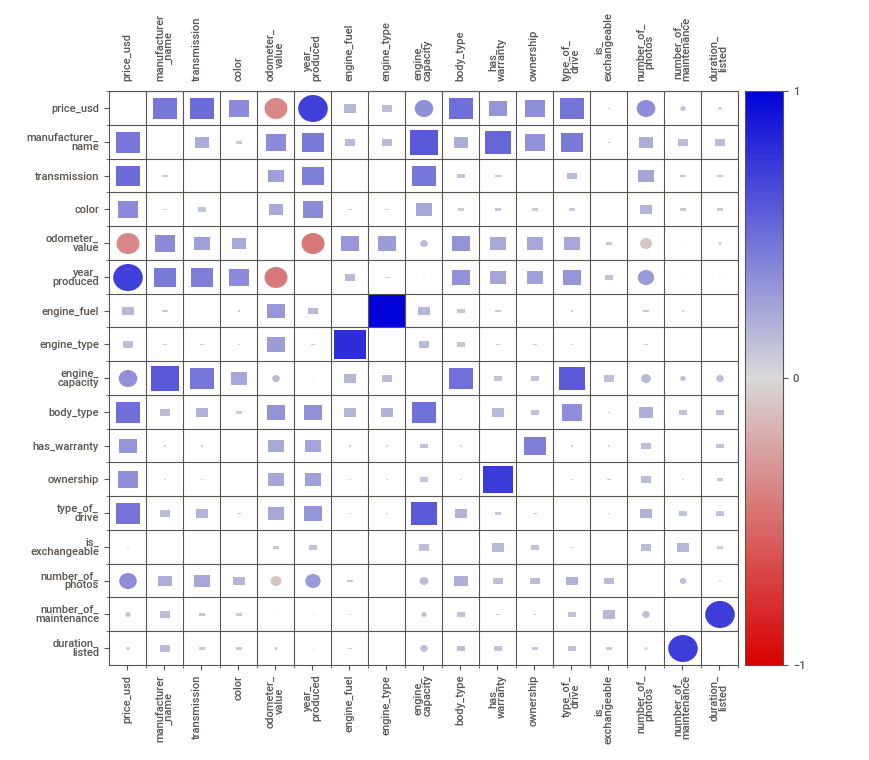
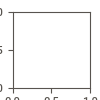

In [7]:
#Installing sweetviz and getting report

!pip install sweetviz
import sweetviz as sv
report = sv.analyze([df_train,'Train'], target_feat='price_usd')
report.show_notebook() 

**EDA Inference** :
Features Overview
*   Price_usd: 
        *   Over 50% of the cars prices range between 0-5,000$
        *   Only 5% of cars have distinct prices
*   Manufacturer_name
        *   18% of the cars are not categorized (Other)
        *   The top manufacturer listed is volkswagen (11%) and sharing the avg price with the overall dataset
*   Transmission
        *   Automatic is more expensive (more than double avg price) but makes up 33% of the dataset
*   Color
        *   Black and blue make up about 20% each
        *   Average price varies between colors
*   Odometer_value
        *   Clear correlation
*   year_produced
        *   Clear correlation & an uptick in price for classic cars
*   engine_fuel
        *   Diesel is more expensive than gasoline
*   engine_type
        *   Is the same feature as engine_fuel
*   engine_capacity
        *   price increases as engine capacity increases
*   body_type
        *   SUV is the most expensive
        *   hatchback is the most expensive
*   has_warranty
        *   having a warranty singificantly increases the price
*   ownership
        *   new is much more expensive but makes up 1% of the dataset
*   type_of_drive
        *   all wheel drive is the most expensive
*   is exchangeable
        *   does not affecr the price
*   number_of_photos
        *   the price increases until about 40 photos
*   number_of_maintenance
        *   the lower the maintenance number the higher the price
*   duration_listed
        *   does not seem to be correlated


**Conclusion** :
The two dominant features are the Odometer value and year produced.


# Model Building



## Categorical features dummies

Starting with the base model, I will create dummies for all the categorical features that seem relevant based on the EDA

In [8]:
# body_type

body_type = df_train['body_type']
body_type = pd.get_dummies(body_type, drop_first=True)
body_type.head()

coupe  hatchback  liftback  limousine  minibus  minivan  pickup  sedan  \
0      0          0         0          0        0        0       0      0   
1      0          0         0          0        0        0       0      1   
2      0          1         0          0        0        0       0      0   
3      0          1         0          0        0        0       0      0   
4      0          0         0          0        0        0       0      1   

   suv  universal  van  
0    0          1    0  
1    0          0    0  
2    0          0    0  
3    0          0    0  
4    0          0    0

In [9]:
# engine_fuel

engine_fuel = df_train['engine_fuel']
engine_fuel = pd.get_dummies(engine_fuel, drop_first=True)
engine_fuel.head()

gas  gasoline  hybrid-diesel  hybrid-petrol
0    0         0              0              0
1    0         1              0              0
2    0         1              0              0
3    0         1              0              0
4    0         1              0              0

In [10]:
# transmission

transmission = df_train['transmission']
transmission = pd.get_dummies(transmission, drop_first=True)
transmission.head()

manual
0       0
1       1
2       0
3       0
4       1

In [11]:
# ownership

ownership = df_train['ownership']
ownership = pd.get_dummies(ownership, drop_first=True)
ownership.head()

new  owned
0    0      1
1    0      1
2    0      1
3    0      1
4    0      1

In [12]:
# type_of_drive

type_of_drive = df_train['type_of_drive']
type_of_drive = pd.get_dummies(type_of_drive, drop_first=True)
type_of_drive.head()

front  rear
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0

In [13]:
# color

color = df_train['color']
color = pd.get_dummies(color, drop_first=True)
color.head()

blue  brown  green  grey  orange  other  red  silver  violet  white  yellow
0     0      0      0     0       0      0    0       0       0      0       0
1     0      1      0     0       0      0    0       0       0      0       0
2     0      1      0     0       0      0    0       0       0      0       0
3     0      0      0     0       0      1    0       0       0      0       0
4     1      0      0     0       0      0    0       0       0      0       0

In [14]:
# has_warranty

has_warranty = df_train['has_warranty']
has_warranty = pd.get_dummies(has_warranty, drop_first=True)
has_warranty.head()

True
0     0
1     0
2     0
3     0
4     0

Dropping redundant and irrelevant features to the price based on the EDA

In [15]:
# Drop manufacturer name, engine_type and is_exchangeable features
df_train.drop(["manufacturer_name","engine_type","is_exchangeable"],axis=1,inplace=True)

In [16]:
#Combining the dummies and df_train dataset to create the final training dataset
final_df_train= pd.concat([df_train,body_type,engine_fuel,transmission,ownership,type_of_drive,color,has_warranty],axis=1)
final_df_train.head()

transmission  color  odometer_value  year_produced engine_fuel  \
0    automatic  black          130000           2016      diesel   
1       manual  brown          149000           2012    gasoline   
2    automatic  brown          110000           2014    gasoline   
3    automatic  other          255100           2007    gasoline   
4       manual   blue          650000           1999    gasoline   

   engine_capacity  body_type  has_warranty ownership type_of_drive  \
0              1.6  universal         False     owned         front   
1              1.6      sedan         False     owned         front   
2              1.6  hatchback         False     owned         front   
3              1.8  hatchback         False     owned         front   
4              2.0      sedan         False     owned         front   

   number_of_photos  number_of_maintenance  duration_listed  price_usd  coupe  \
0                17                     38               67    13150.0      0   
1                 9                      3              100     7500.0      0   
2                 5                     10               91    12200.0      0   
3                10                      4               91     4950.0      0   
4                 5                      7               62     3000.0      0   

   hatchback  liftback  limousine  minibus  minivan  pickup  sedan  suv  \
0          0         0          0        0        0       0      0    0   
1          0         0          0        0        0       0      1    0   
2          1         0          0        0        0       0      0    0   
3          1         0          0        0        0       0      0    0   
4          0         0          0        0        0       0      1    0   

   universal  van  gas  gasoline  hybrid-diesel  hybrid-petrol  manual  new  \
0          1    0    0         0              0              0       0    0   
1          0    0    0         1              0              0       1    0   
2          0    0    0         1              0              0       0    0   
3          0    0    0         1              0              0       0    0   
4          0    0    0         1              0              0       1    0   

   owned  front  rear  blue  brown  green  grey  orange  other  red  silver  \
0      1      1     0     0      0      0     0       0      0    0       0   
1      1      1     0     0      1      0     0       0      0    0       0   
2      1      1     0     0      1      0     0       0      0    0       0   
3      1      1     0     0      0      0     0       0      1    0       0   
4      1      1     0     1      0      0     0       0      0    0       0   

   violet  white  yellow  True  
0       0      0       0     0  
1       0      0       0     0  
2       0      0       0     0  
3       0      0       0     0  
4       0      0       0     0

In [17]:
#Dropping all categorical features
final_df_train.drop(["body_type","engine_fuel","transmission","ownership","type_of_drive","color","has_warranty"],axis=1,inplace=True)
final_df_train.head()

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          130000           2016              1.6                17   
1          149000           2012              1.6                 9   
2          110000           2014              1.6                 5   
3          255100           2007              1.8                10   
4          650000           1999              2.0                 5   

   number_of_maintenance  duration_listed  price_usd  coupe  hatchback  \
0                     38               67    13150.0      0          0   
1                      3              100     7500.0      0          0   
2                     10               91    12200.0      0          1   
3                      4               91     4950.0      0          1   
4                      7               62     3000.0      0          0   

   liftback  limousine  minibus  minivan  pickup  sedan  suv  universal  van  \
0         0          0        0        0       0      0    0          1    0   
1         0          0        0        0       0      1    0          0    0   
2         0          0        0        0       0      0    0          0    0   
3         0          0        0        0       0      0    0          0    0   
4         0          0        0        0       0      1    0          0    0   

   gas  gasoline  hybrid-diesel  hybrid-petrol  manual  new  owned  front  \
0    0         0              0              0       0    0      1      1   
1    0         1              0              0       1    0      1      1   
2    0         1              0              0       0    0      1      1   
3    0         1              0              0       0    0      1      1   
4    0         1              0              0       1    0      1      1   

   rear  blue  brown  green  grey  orange  other  red  silver  violet  white  \
0     0     0      0      0     0       0      0    0       0       0      0   
1     0     0      1      0     0       0      0    0       0       0      0   
2     0     0      1      0     0       0      0    0       0       0      0   
3     0     0      0      0     0       0      1    0       0       0      0   
4     0     1      0      0     0       0      0    0       0       0      0   

   yellow  True  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0

In [18]:
final_df_train.shape # (49,985  39)

(49985, 39)

## Preparing Test Data

Test/Evaluation dataset goes through the same process as the training dataset to prepare it for evaluation after building the model

In [19]:
df_test = pd.read_csv('https://raw.githubusercontent.com/rihal-om/rihal-challenges/main/data_science/data_test.csv')
df_test.head()

manufacturer_name transmission   color  odometer_value  year_produced  \
0               BMW    automatic   white          115000           2012   
1     Mercedes-Benz       manual   other          500000           1999   
2              Fiat       manual  silver          210000           2002   
3        Mitsubishi    automatic  violet          294000           2000   
4              Opel    automatic    blue          244000           1998   

  engine_fuel engine_type  engine_capacity  body_type  has_warranty ownership  \
0    gasoline    gasoline              4.4      sedan         False     owned   
1      diesel      diesel              2.2      sedan         False     owned   
2    gasoline    gasoline              1.2  hatchback         False     owned   
3      diesel      diesel              3.2        suv         False     owned   
4    gasoline    gasoline              1.6      sedan         False     owned   

  type_of_drive  is_exchangeable  number_of_photos  number_of_maintenance  \
0           all             True                32                    104   
1          rear            False                 7                      9   
2         front             True                16                      7   
3           all             True                10                      2   
4         front            False                 9                     10   

   duration_listed  price_usd  
0              146    20450.0  
1              147     2600.0  
2               27     2900.0  
3               48     7500.0  
4              116     2200.0

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      27000 non-null  object 
 1   transmission           27000 non-null  object 
 2   color                  27000 non-null  object 
 3   odometer_value         27000 non-null  int64  
 4   year_produced          27000 non-null  int64  
 5   engine_fuel            27000 non-null  object 
 6   engine_type            27000 non-null  object 
 7   engine_capacity        26995 non-null  float64
 8   body_type              27000 non-null  object 
 9   has_warranty           27000 non-null  bool   
 10  ownership              27000 non-null  object 
 11  type_of_drive          27000 non-null  object 
 12  is_exchangeable        27000 non-null  bool   
 13  number_of_photos       27000 non-null  int64  
 14  number_of_maintenance  27000 non-null  int64  
 15  du

In [21]:
# Drop null values
df_test.dropna(inplace=True)
#New df with non null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26995 entries, 0 to 26999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      26995 non-null  object 
 1   transmission           26995 non-null  object 
 2   color                  26995 non-null  object 
 3   odometer_value         26995 non-null  int64  
 4   year_produced          26995 non-null  int64  
 5   engine_fuel            26995 non-null  object 
 6   engine_type            26995 non-null  object 
 7   engine_capacity        26995 non-null  float64
 8   body_type              26995 non-null  object 
 9   has_warranty           26995 non-null  bool   
 10  ownership              26995 non-null  object 
 11  type_of_drive          26995 non-null  object 
 12  is_exchangeable        26995 non-null  bool   
 13  number_of_photos       26995 non-null  int64  
 14  number_of_maintenance  26995 non-null  int64  
 15  du

In [22]:
df_test.shape #(26,995, 17)

(26995, 17)

In [23]:
# body_type

body_type = df_test['body_type']
body_type = pd.get_dummies(body_type, drop_first=True)
body_type.head()

# engine_fuel

engine_fuel = df_test['engine_fuel']
engine_fuel = pd.get_dummies(engine_fuel, drop_first=True)
engine_fuel.head()

# transmission

transmission = df_test['transmission']
transmission = pd.get_dummies(transmission, drop_first=True)
transmission.head()

# ownership

ownership = df_test['ownership']
ownership = pd.get_dummies(ownership, drop_first=True)
ownership.head()

# type_of_drive

type_of_drive = df_test['type_of_drive']
type_of_drive = pd.get_dummies(type_of_drive, drop_first=True)
type_of_drive.head()

# color

color = df_test['color']
color = pd.get_dummies(color, drop_first=True)
color.head()

# has_warranty

has_warranty = df_test['has_warranty']
has_warranty = pd.get_dummies(has_warranty, drop_first=True)
has_warranty.head()

# Drop manufacturer name
df_test.drop(["manufacturer_name","engine_type","is_exchangeable"],axis=1,inplace=True)


final_df_test= pd.concat([df_test,body_type,engine_fuel,transmission,ownership,type_of_drive,color,has_warranty],axis=1)
final_df_test.drop(["body_type","engine_fuel","transmission","ownership","type_of_drive","color","has_warranty"],axis=1,inplace=True)

final_df_test.head()

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          115000           2012              4.4                32   
1          500000           1999              2.2                 7   
2          210000           2002              1.2                16   
3          294000           2000              3.2                10   
4          244000           1998              1.6                 9   

   number_of_maintenance  duration_listed  price_usd  coupe  hatchback  \
0                    104              146    20450.0      0          0   
1                      9              147     2600.0      0          0   
2                      7               27     2900.0      0          1   
3                      2               48     7500.0      0          0   
4                     10              116     2200.0      0          0   

   liftback  limousine  minibus  minivan  pickup  sedan  suv  universal  van  \
0         0          0        0        0       0      1    0          0    0   
1         0          0        0        0       0      1    0          0    0   
2         0          0        0        0       0      0    0          0    0   
3         0          0        0        0       0      0    1          0    0   
4         0          0        0        0       0      1    0          0    0   

   gas  gasoline  hybrid-petrol  manual  new  owned  front  rear  blue  brown  \
0    0         1              0       0    0      1      0     0     0      0   
1    0         0              0       1    0      1      0     1     0      0   
2    0         1              0       1    0      1      1     0     0      0   
3    0         0              0       0    0      1      0     0     0      0   
4    0         1              0       0    0      1      1     0     1      0   

   green  grey  orange  other  red  silver  violet  white  yellow  True  
0      0     0       0      0    0       0       0      1       0     0  
1      0     0       0      1    0       0       0      0       0     0  
2      0     0       0      0    0       1       0      0       0     0  
3      0     0       0      0    0       0       1      0       0     0  
4      0     0       0      0    0       0       0      0       0     0

In [24]:
final_df_test.shape # (26,995  38)

(26995, 38)

Since the feature 'engine_fuel' does not include any 'hybrid-diesel' type in the test dataset I will add it to the final test dataset to evaluate on equal number of features with the final_df_train dataset

In [25]:
final_df_test['hybrid-diesel']=0

In [26]:
final_df_test.head()

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          115000           2012              4.4                32   
1          500000           1999              2.2                 7   
2          210000           2002              1.2                16   
3          294000           2000              3.2                10   
4          244000           1998              1.6                 9   

   number_of_maintenance  duration_listed  price_usd  coupe  hatchback  \
0                    104              146    20450.0      0          0   
1                      9              147     2600.0      0          0   
2                      7               27     2900.0      0          1   
3                      2               48     7500.0      0          0   
4                     10              116     2200.0      0          0   

   liftback  limousine  minibus  minivan  pickup  sedan  suv  universal  van  \
0         0          0        0        0       0      1    0          0    0   
1         0          0        0        0       0      1    0          0    0   
2         0          0        0        0       0      0    0          0    0   
3         0          0        0        0       0      0    1          0    0   
4         0          0        0        0       0      1    0          0    0   

   gas  gasoline  hybrid-petrol  manual  new  owned  front  rear  blue  brown  \
0    0         1              0       0    0      1      0     0     0      0   
1    0         0              0       1    0      1      0     1     0      0   
2    0         1              0       1    0      1      1     0     0      0   
3    0         0              0       0    0      1      0     0     0      0   
4    0         1              0       0    0      1      1     0     1      0   

   green  grey  orange  other  red  silver  violet  white  yellow  True  \
0      0     0       0      0    0       0       0      1       0     0   
1      0     0       0      1    0       0       0      0       0     0   
2      0     0       0      0    0       1       0      0       0     0   
3      0     0       0      0    0       0       1      0       0     0   
4      0     0       0      0    0       0       0      0       0     0   

   hybrid-diesel  
0              0  
1              0  
2              0  
3              0  
4              0

## Model

### Displaying the two dataset to compare them with each other

In [27]:
# Display dataset to be used for training and evaluating the base model
display(final_df_train.head())
display(final_df_test.head())

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          130000           2016              1.6                17   
1          149000           2012              1.6                 9   
2          110000           2014              1.6                 5   
3          255100           2007              1.8                10   
4          650000           1999              2.0                 5   

   number_of_maintenance  duration_listed  price_usd  coupe  hatchback  \
0                     38               67    13150.0      0          0   
1                      3              100     7500.0      0          0   
2                     10               91    12200.0      0          1   
3                      4               91     4950.0      0          1   
4                      7               62     3000.0      0          0   

   liftback  limousine  minibus  minivan  pickup  sedan  suv  universal  van  \
0         0          0        0        0       0      0    0          1    0   
1         0          0        0        0       0      1    0          0    0   
2         0          0        0        0       0      0    0          0    0   
3         0          0        0        0       0      0    0          0    0   
4         0          0        0        0       0      1    0          0    0   

   gas  gasoline  hybrid-diesel  hybrid-petrol  manual  new  owned  front  \
0    0         0              0              0       0    0      1      1   
1    0         1              0              0       1    0      1      1   
2    0         1              0              0       0    0      1      1   
3    0         1              0              0       0    0      1      1   
4    0         1              0              0       1    0      1      1   

   rear  blue  brown  green  grey  orange  other  red  silver  violet  white  \
0     0     0      0      0     0       0      0    0       0       0      0   
1     0     0      1      0     0       0      0    0       0       0      0   
2     0     0      1      0     0       0      0    0       0       0      0   
3     0     0      0      0     0       0      1    0       0       0      0   
4     0     1      0      0     0       0      0    0       0       0      0   

   yellow  True  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          115000           2012              4.4                32   
1          500000           1999              2.2                 7   
2          210000           2002              1.2                16   
3          294000           2000              3.2                10   
4          244000           1998              1.6                 9   

   number_of_maintenance  duration_listed  price_usd  coupe  hatchback  \
0                    104              146    20450.0      0          0   
1                      9              147     2600.0      0          0   
2                      7               27     2900.0      0          1   
3                      2               48     7500.0      0          0   
4                     10              116     2200.0      0          0   

   liftback  limousine  minibus  minivan  pickup  sedan  suv  universal  van  \
0         0          0        0        0       0      1    0          0    0   
1         0          0        0        0       0      1    0          0    0   
2         0          0        0        0       0      0    0          0    0   
3         0          0        0        0       0      0    1          0    0   
4         0          0        0        0       0      1    0          0    0   

   gas  gasoline  hybrid-petrol  manual  new  owned  front  rear  blue  brown  \
0    0         1              0       0    0      1      0     0     0      0   
1    0         0              0       1    0      1      0     1     0      0   
2    0         1              0       1    0      1      1     0     0      0   
3    0         0              0       0    0      1      0     0     0      0   
4    0         1              0       0    0      1      1     0     1      0   

   green  grey  orange  other  red  silver  violet  white  yellow  True  \
0      0     0       0      0    0       0       0      1       0     0   
1      0     0       0      1    0       0       0      0       0     0   
2      0     0       0      0    0       1       0      0       0     0   
3      0     0       0      0    0       0       1      0       0     0   
4      0     0       0      0    0       0       0      0       0     0   

   hybrid-diesel  
0              0  
1              0  
2              0  
3              0  
4              0

In [28]:
#Train Featurees
final_df_train.shape # 39 features

(49985, 39)

In [29]:
# Test Features
final_df_test.shape # 39 features

(26995, 39)

### Defining x & y to train

In [30]:
#Columns to work with

final_df_train.columns

Index([       'odometer_value',         'year_produced',
             'engine_capacity',      'number_of_photos',
       'number_of_maintenance',       'duration_listed',
                   'price_usd',                 'coupe',
                   'hatchback',              'liftback',
                   'limousine',               'minibus',
                     'minivan',                'pickup',
                       'sedan',                   'suv',
                   'universal',                   'van',
                         'gas',              'gasoline',
               'hybrid-diesel',         'hybrid-petrol',
                      'manual',                   'new',
                       'owned',                 'front',
                        'rear',                  'blue',
                       'brown',                 'green',
                        'grey',                'orange',
                       'other',                   'red',
                      'silver',

In [31]:
#defining x for training and Getting rid of targeted column 'price_usd'
X = final_df_train.loc[:,[       'odometer_value',         'year_produced',
             'engine_capacity',      'number_of_photos',
       'number_of_maintenance',       'duration_listed',
                       'coupe',
                   'hatchback',              'liftback',
                   'limousine',               'minibus',
                     'minivan',                'pickup',
                       'sedan',                   'suv',
                   'universal',                   'van',
                         'gas',              'gasoline',
               'hybrid-diesel',         'hybrid-petrol',
                      'manual',                   'new',
                       'owned',                 'front',
                        'rear',                  'blue',
                       'brown',                 'green',
                        'grey',                'orange',
                       'other',                   'red',
                      'silver',                'violet',
                       'white',                'yellow',
                          True]]
X.head()

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          130000           2016              1.6                17   
1          149000           2012              1.6                 9   
2          110000           2014              1.6                 5   
3          255100           2007              1.8                10   
4          650000           1999              2.0                 5   

   number_of_maintenance  duration_listed  coupe  hatchback  liftback  \
0                     38               67      0          0         0   
1                      3              100      0          0         0   
2                     10               91      0          1         0   
3                      4               91      0          1         0   
4                      7               62      0          0         0   

   limousine  minibus  minivan  pickup  sedan  suv  universal  van  gas  \
0          0        0        0       0      0    0          1    0    0   
1          0        0        0       0      1    0          0    0    0   
2          0        0        0       0      0    0          0    0    0   
3          0        0        0       0      0    0          0    0    0   
4          0        0        0       0      1    0          0    0    0   

   gasoline  hybrid-diesel  hybrid-petrol  manual  new  owned  front  rear  \
0         0              0              0       0    0      1      1     0   
1         1              0              0       1    0      1      1     0   
2         1              0              0       0    0      1      1     0   
3         1              0              0       0    0      1      1     0   
4         1              0              0       1    0      1      1     0   

   blue  brown  green  grey  orange  other  red  silver  violet  white  \
0     0      0      0     0       0      0    0       0       0      0   
1     0      1      0     0       0      0    0       0       0      0   
2     0      1      0     0       0      0    0       0       0      0   
3     0      0      0     0       0      1    0       0       0      0   
4     1      0      0     0       0      0    0       0       0      0   

   yellow  True  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0

In [32]:
#defining y and keeping targeted column 'price_usd'
y = final_df_train.loc[:,['price_usd']]
y.head()

price_usd
0    13150.0
1     7500.0
2    12200.0
3     4950.0
4     3000.0

Visualizing the correlation between features

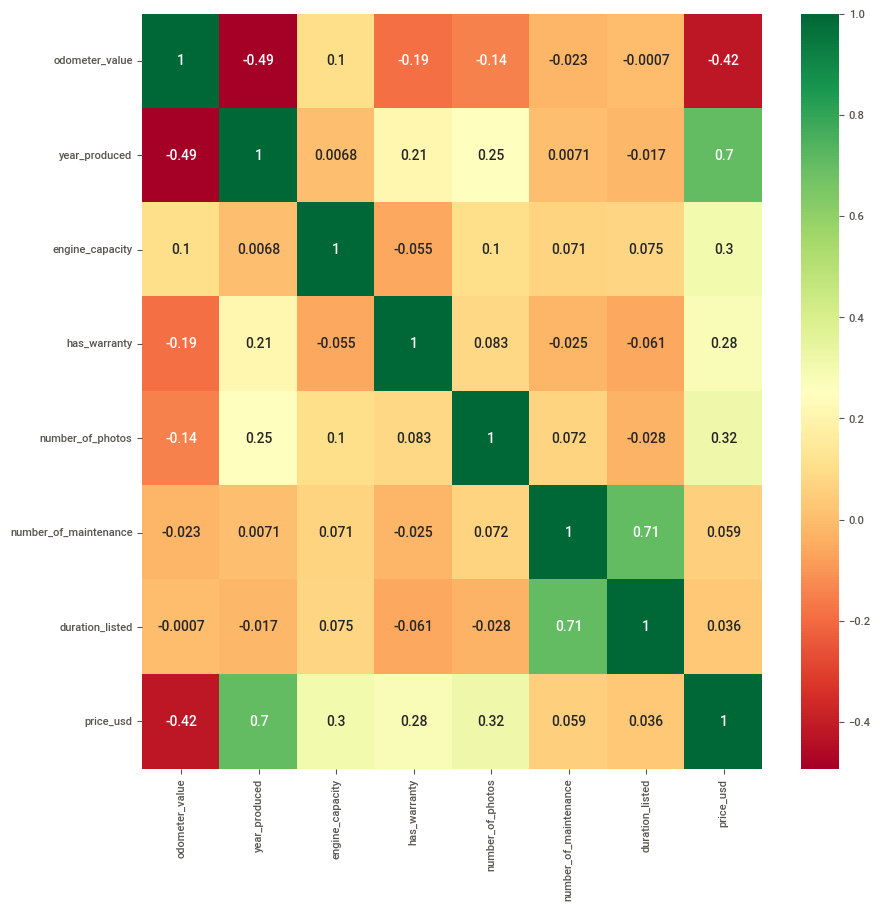

In [33]:
#Training dataset(df_train) BEFORE adding dummies/removing categorical features
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

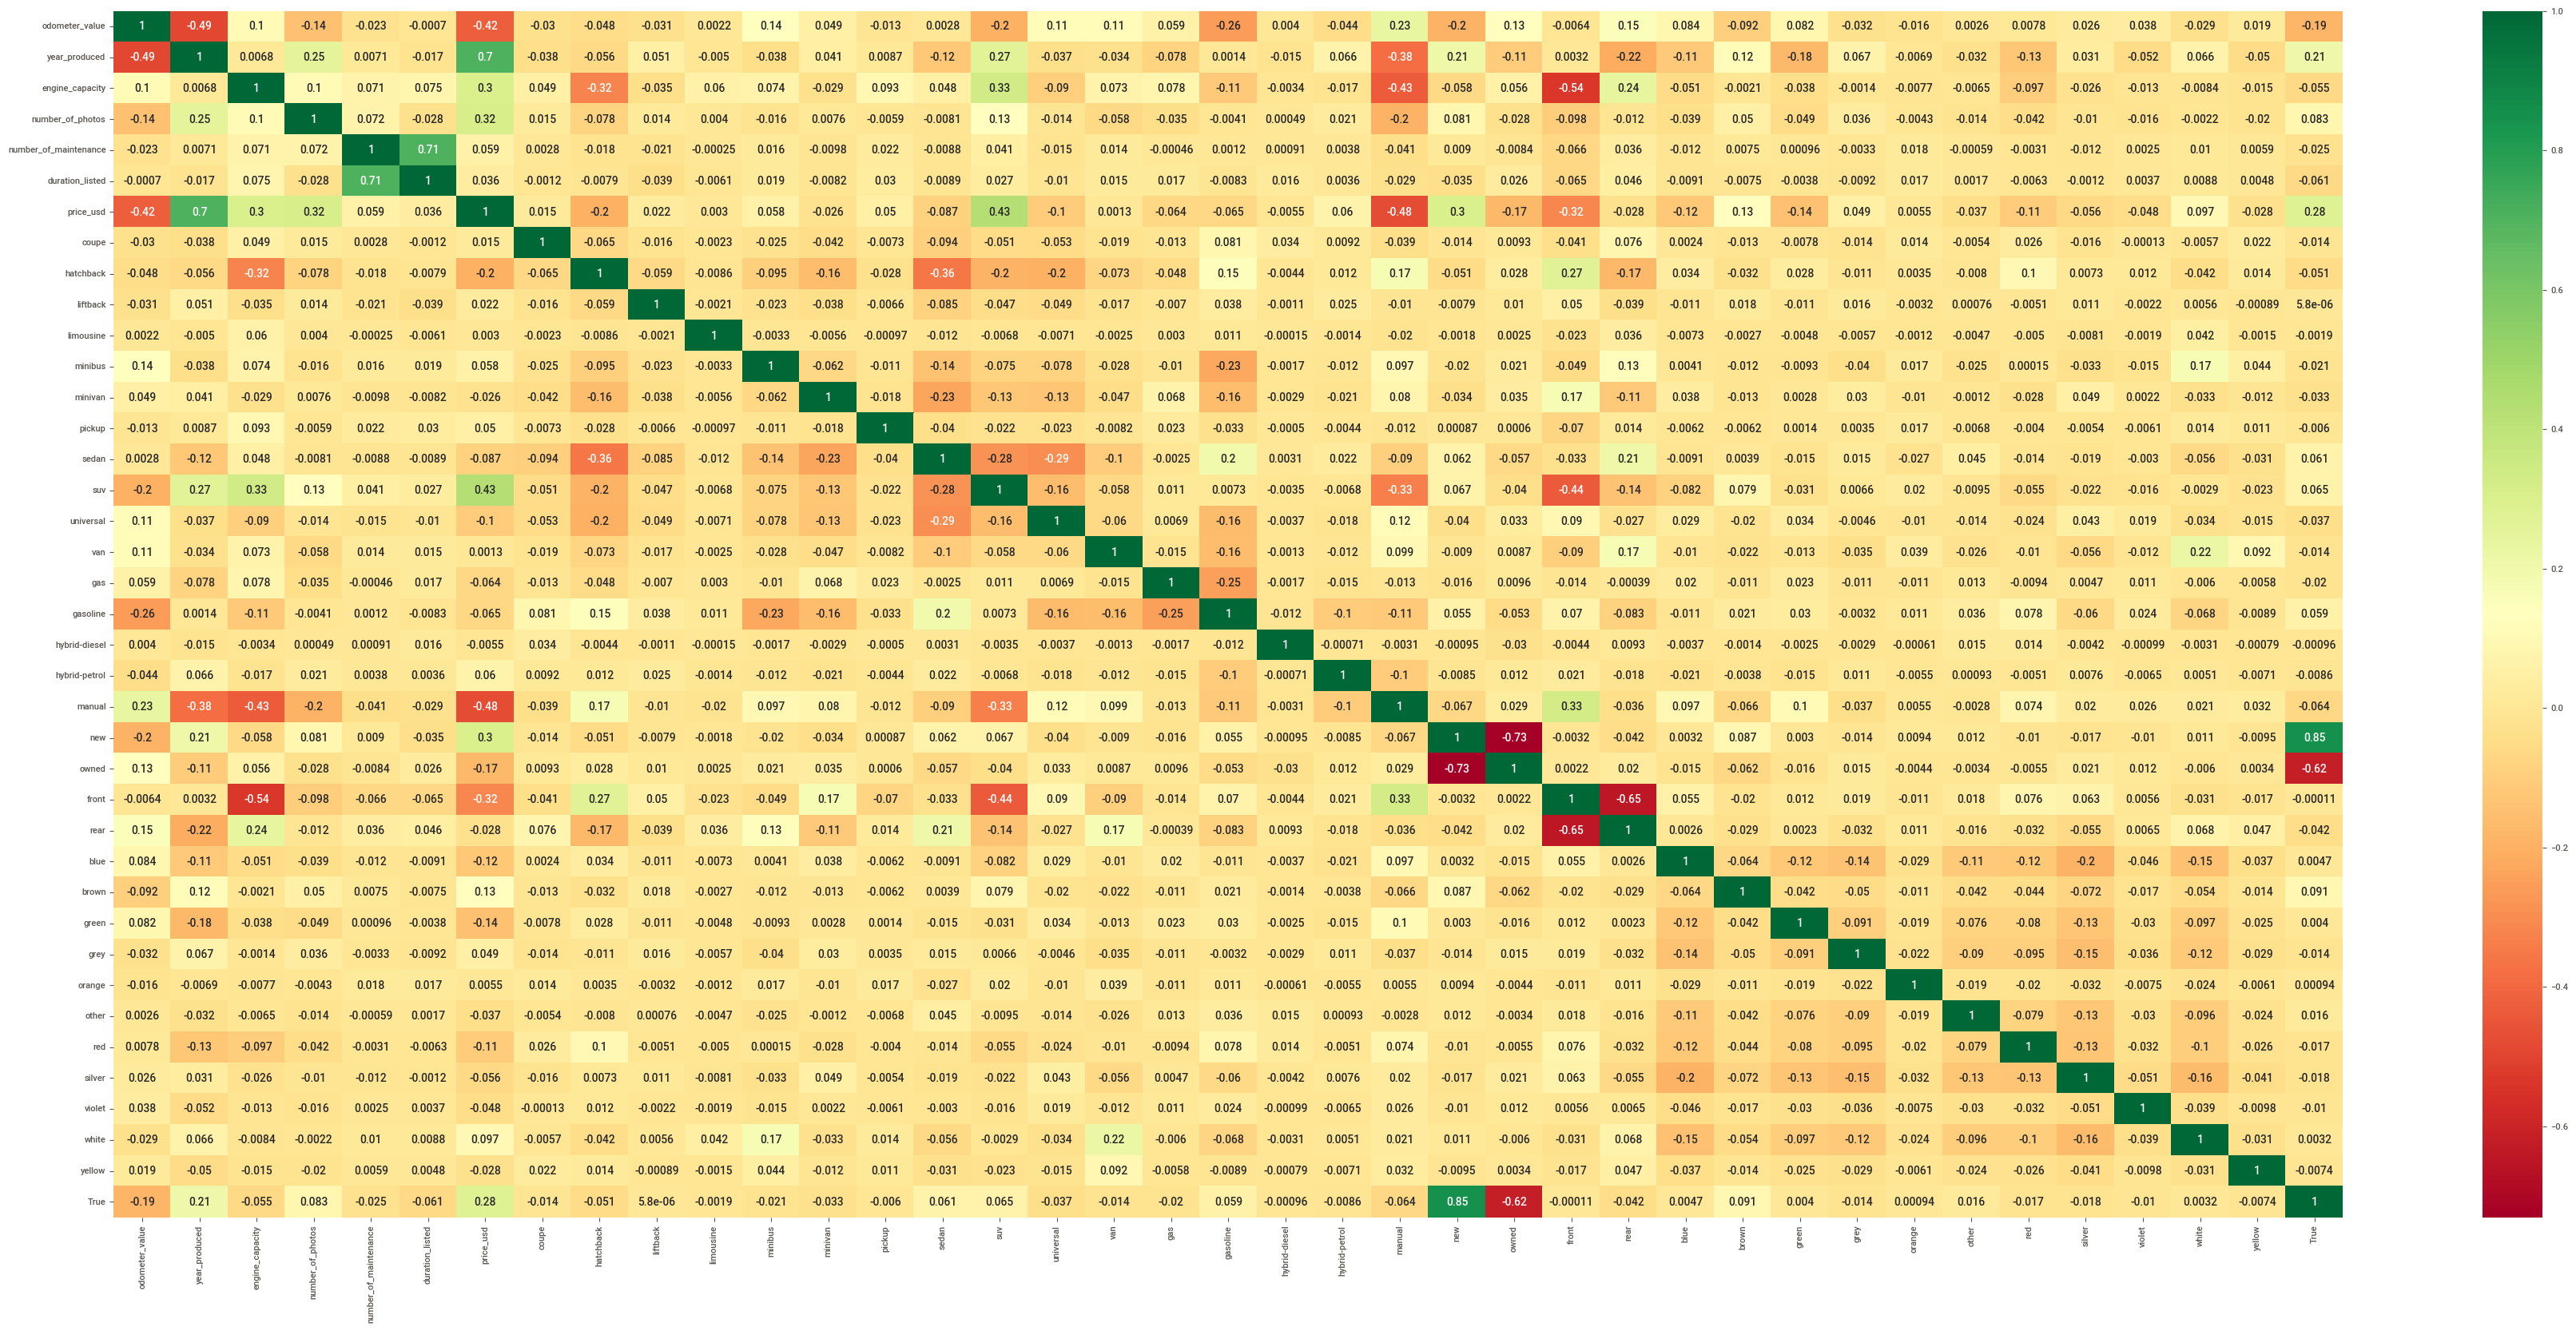

In [34]:
#Training dataset(df_train) AFTER adding dummies/removing categorical features
plt.figure(figsize=(45,20))
sns.heatmap(final_df_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

The correlation matrix confirms initial EDA inference

### Base Models

Tain split test

In [35]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

##### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train)) #  0.701
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test)) # 0.696

Accuracy on Traing set:  0.7012404060419203
Accuracy on Testing set:  0.696371515490867


#### Random Forest Regressor

Trying a better model to imporve the accuracy based on Linear Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor  
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train)) # 0.990
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test)) # 0.935

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Traing set:  0.9903629073707112
Accuracy on Testing set:  0.9342964724008757


In [38]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred)) # 892.27
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  895.9409567573035
Mean Squared  Error      :  2588317.643218648
Root Mean Squared  Error :  1608.8249262174702
R Squared Error          :  0.9342964724008757


**Mean Absolute Error**      :  894.0860785592881 score before evaluating

#### Evaluation dataset preparation

In [39]:
val_train = final_df_test.loc[:,[       'odometer_value',         'year_produced',
             'engine_capacity',      'number_of_photos',
       'number_of_maintenance',       'duration_listed',
                       'coupe',
                   'hatchback',              'liftback',
                   'limousine',               'minibus',
                     'minivan',                'pickup',
                       'sedan',                   'suv',
                   'universal',                   'van',
                         'gas',              'gasoline',
               'hybrid-diesel',         'hybrid-petrol',
                      'manual',                   'new',
                       'owned',                 'front',
                        'rear',                  'blue',
                       'brown',                 'green',
                        'grey',                'orange',
                       'other',                   'red',
                      'silver',                'violet',
                       'white',                'yellow',
                          True]]
val_train.head()

odometer_value  year_produced  engine_capacity  number_of_photos  \
0          115000           2012              4.4                32   
1          500000           1999              2.2                 7   
2          210000           2002              1.2                16   
3          294000           2000              3.2                10   
4          244000           1998              1.6                 9   

   number_of_maintenance  duration_listed  coupe  hatchback  liftback  \
0                    104              146      0          0         0   
1                      9              147      0          0         0   
2                      7               27      0          1         0   
3                      2               48      0          0         0   
4                     10              116      0          0         0   

   limousine  minibus  minivan  pickup  sedan  suv  universal  van  gas  \
0          0        0        0       0      1    0          0    0    0   
1          0        0        0       0      1    0          0    0    0   
2          0        0        0       0      0    0          0    0    0   
3          0        0        0       0      0    1          0    0    0   
4          0        0        0       0      1    0          0    0    0   

   gasoline  hybrid-diesel  hybrid-petrol  manual  new  owned  front  rear  \
0         1              0              0       0    0      1      0     0   
1         0              0              0       1    0      1      0     1   
2         1              0              0       1    0      1      1     0   
3         0              0              0       0    0      1      0     0   
4         1              0              0       0    0      1      1     0   

   blue  brown  green  grey  orange  other  red  silver  violet  white  \
0     0      0      0     0       0      0    0       0       0      1   
1     0      0      0     0       0      1    0       0       0      0   
2     0      0      0     0       0      0    0       1       0      0   
3     0      0      0     0       0      0    0       0       1      0   
4     1      0      0     0       0      0    0       0       0      0   

   yellow  True  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0

In [40]:
val_test = final_df_test.loc[:,['price_usd']]
val_test.head()

price_usd
0    20450.0
1     2600.0
2     2900.0
3     7500.0
4     2200.0

#### Evaluate model

In [41]:
#Evaluate model
y_val= rf_reg.predict(val_train)


print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(val_test, y_val)) # 881.699
print('Mean Squared  Error      : ', metrics.mean_squared_error(val_test, y_val))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(val_test, y_val)))
print('R Squared Error          : ', metrics.r2_score(val_test, y_val))

		Error Table
Mean Absolute Error      :  881.0900530911822
Mean Squared  Error      :  2512709.8596586045
Root Mean Squared  Error :  1585.152945194439
R Squared Error          :  0.9378364510011519


**Mean Absolute Error**     :  881.6992303404215 after evaluating

The evaluation metric to be used(MAE) has improved slightly after testing the Random Forest Regressor model on the test dataset

# Pycaret

I will be using Pycaret to compare different and find the best suitable model

#### Model building and comparison

In [42]:
1#Installation
!pip install pycaret

In [43]:
#Display Pycaret interactive visuals
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [44]:
#Setup and confirm features(numeric/categorical)
from pycaret.regression import *
exp_reg101 = setup(data = df_train, target = 'price_usd', session_id=1)

Description             Value
0                               session_id                 1
1                                   Target         price_usd
2                            Original Data       (49985, 14)
3                           Missing Values             False
4                         Numeric Features                 6
5                     Categorical Features                 7
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set       (34989, 43)
10                    Transformed Test Set       (14996, 43)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              eea2
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [45]:
#Compare models top 3 based on R2

top3 = compare_models(exclude = ['ransac'], n_select = 3) #Extra Trees Regressor #1 MAE = 790.7538

Model         MAE           MSE  \
et                  Extra Trees Regressor    790.7538  2.943936e+06   
rf                Random Forest Regressor    986.2933  3.156880e+06   
lightgbm  Light Gradient Boosting Machine   1293.1686  4.287025e+06   
gbr           Gradient Boosting Regressor   1424.3461  5.262099e+06   
dt                Decision Tree Regressor   1082.0805  5.453036e+06   
lasso                    Lasso Regression   2272.1158  1.261376e+07   
ridge                    Ridge Regression   2272.6676  1.261341e+07   
br                         Bayesian Ridge   2272.7190  1.261319e+07   
lr                      Linear Regression   2272.3474  1.261928e+07   
llar         Lasso Least Angle Regression   2258.0460  1.307235e+07   
omp           Orthogonal Matching Pursuit   2447.3056  1.484683e+07   
en                            Elastic Net   2435.5482  1.517767e+07   
ada                    AdaBoost Regressor   4269.9838  2.346373e+07   
knn                 K Neighbors Regressor   3193.8441  2.463722e+07   
huber                     Huber Regressor   3911.1453  3.578643e+07   
dummy                     Dummy Regressor   4608.3477  4.197471e+07   
lar                Least Angle Regression   5078.8904  1.582682e+08   
par          Passive Aggressive Regressor  24212.4513  4.422621e+09   

                RMSE        R2   RMSLE     MAPE  TT (Sec)  
et         1714.5830    0.9296  0.3213   0.3858    14.717  
rf         1776.0906    0.9246  0.3431   0.4370    17.839  
lightgbm   2070.2955    0.8976  0.4158   0.5114     0.377  
gbr        2293.5071    0.8744  0.4376   0.5343     4.004  
dt         2332.6962    0.8696  0.4269   0.4330     0.300  
lasso      3550.4999    0.6993  0.7301   1.0963     0.180  
ridge      3550.4500    0.6993  0.7318   1.0880     0.036  
br         3550.4176    0.6993  0.7332   1.0913     0.109  
lr         3551.2610    0.6991  0.7324   1.0977     0.341  
llar       3614.2381    0.6884  0.6973   1.1294     0.042  
omp        3851.8756    0.6461  0.7108   1.1909     0.038  
en         3893.7595    0.6386  0.7208   1.2809     0.183  
ada        4840.5111    0.4397  1.0910   3.2746     2.563  
knn        4962.6081    0.4123  0.8063   1.3386     0.307  
huber      5980.4353    0.1471  1.0124   2.5332     0.417  
dummy      6476.6333   -0.0002  1.1233   3.2339     0.026  
lar        7021.5673   -2.5409  0.8736   2.6108     0.045  
par       29755.0071 -114.6158  1.5994  15.9321     0.122

In [46]:
# Creating Extra Trees Regressor Model
et = create_model('et')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     788.0552  2.965878e+06  1722.1724  0.9333  0.3191  0.3911
1     809.0684  3.196678e+06  1787.9256  0.9282  0.3072  0.2050
2     787.7520  2.866220e+06  1692.9915  0.9362  0.3359  0.9248
3     754.4810  2.715227e+06  1647.7945  0.9319  0.3264  0.8880
4     806.9885  3.059188e+06  1749.0536  0.9279  0.3245  0.2173
5     802.1783  2.956719e+06  1719.5114  0.9290  0.3366  0.3943
6     756.4292  2.442975e+06  1563.0020  0.9423  0.3113  0.2045
7     776.5485  3.012634e+06  1735.6941  0.9239  0.2972  0.1926
8     810.5611  3.013218e+06  1735.8624  0.9278  0.3245  0.2165
9     815.4760  3.210627e+06  1791.8223  0.9159  0.3303  0.2237
Mean  790.7538  2.943936e+06  1714.5830  0.9296  0.3213  0.3858
SD     21.0832  2.162775e+05    64.3563  0.0067  0.0121  0.2700

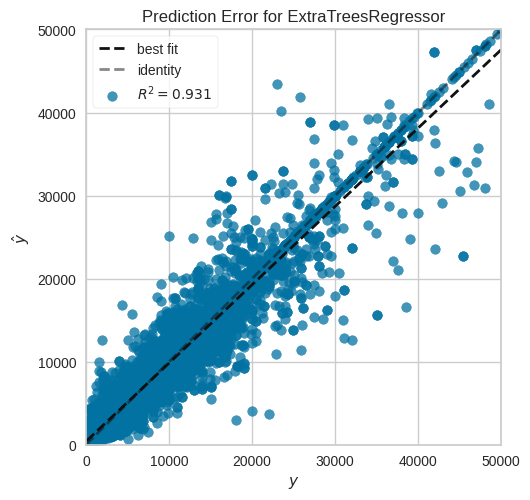

In [47]:
# Visualize the model
plot_model(et, plot = 'error')

In [48]:
#Predict model
predict_model(et);

Model       MAE           MSE  ...      R2   RMSLE    MAPE
0  Extra Trees Regressor  746.4505  2.844247e+06  ...  0.9311  0.2968  0.1887

[1 rows x 7 columns]

In [49]:
#Finalize model
final_et = finalize_model(et)

In [50]:
#Predict final model
predict_model(final_et);

Model     MAE         MSE      RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  8.1642  19455.7052  139.4837  0.9995  0.0064  0.0004

In [51]:
#Evaluate model on test dataset
unseen_predictions = predict_model(final_et, data=df_test)
unseen_predictions.head()

transmission   color  ...  price_usd         Label
0    automatic   white  ...    20450.0  20450.000000
1       manual   other  ...     2600.0   2600.000000
2       manual  silver  ...     2900.0   2890.505601
3    automatic  violet  ...     7500.0   7500.000000
4    automatic    blue  ...     2200.0   3020.223799

[5 rows x 15 columns]

In [52]:
#Check new MAE
from pycaret.utils import check_metric
check_metric(unseen_predictions.price_usd, unseen_predictions.Label, 'MAE') # 460.6082

460.6082

# Conclusion

Extra Trees Regressor is a better model compared to other regression models, it provides an MAE score of 460.61 which is significantly better than our base model(Random Forest Regression) that provided an MAE score of 892.27